In [1]:
%matplotlib -- inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
super_data=np.load('super_data_new.npy')
#kai=np.load('kais_cd.npy')
#gon=np.load('gons_cd.npy')
#dan=np.load('dans_cd.npy')


### logistic regression 

In [3]:
from sklearn import linear_model
from sklearn import cross_validation

In [4]:
train_in,w_in,train_tar,w_tar=cross_validation.train_test_split(
super_data[:,:42],super_data[:,42:45],test_size=0.33)

In [5]:
def logreg_fit(ins,tar,idx):
    logreg=linear_model.LogisticRegression(C=1000000)
    X=ins
    Y=np.array(tar.argmax(axis=1)==idx,dtype=float)
    logreg.fit(X,Y)
    return logreg

In [6]:
def logreg_er(logreg,ins,tar,idx):
    o=logreg.predict(ins)
    t=np.array(tar.argmax(axis=1)==idx,dtype=float)
    er=np.abs(t-o).sum()/t.shape[0]
    return er

In [7]:
logreg_k=logreg_fit(train_in,train_tar,2)
logreg_g=logreg_fit(train_in,train_tar,1)
logreg_d=logreg_fit(train_in,train_tar,0)

In [8]:
er_k=logreg_er(logreg_k,w_in,w_tar,2)
er_g=logreg_er(logreg_g,w_in,w_tar,1)
er_d=logreg_er(logreg_d,w_in,w_tar,0)

In [9]:
er_k,er_g,er_d

(0.0, 0.15384615384615385, 0.0)

In [42]:
import copy
import pickle
f=open('log_k_best','wb')
pickle.dump(logreg_k,f)
f.close()

### neural network 

In [12]:
valid_in,test_in,valid_tar,test_tar=cross_validation.train_test_split(
w_in,w_tar,test_size=0.5)

In [13]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure.modules import SigmoidLayer,SoftmaxLayer
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer

In [14]:
ds_train=SupervisedDataSet(50,25)
ds_train.setField('input',train_in)
ds_train.setField('target',train_tar)

In [15]:
net_stam=buildNetwork(42,20,3,outclass=SigmoidLayer)
trainer_stam=BackpropTrainer(net_stam,ds_train)

In [16]:
%%time
er1,er2=trainer_stam.trainUntilConvergence(maxEpochs=100,continueEpochs=2,validationProportion=0.25)

Wall time: 2.43 s


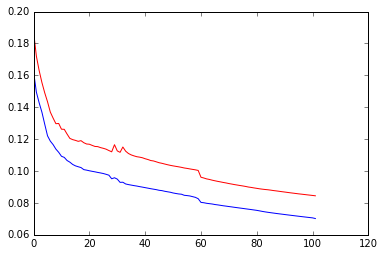

In [17]:
plt.plot(er1,'b-',er2,'r-')

In [18]:
ds_valid=SupervisedDataSet(13,25)
ds_valid.setField('input',valid_in)
ds_valid.setField('target',valid_tar)

In [47]:
best_net=net_stam
err=(best_net.activateOnDataset(ds_valid).argmax(axis=1)!=ds_valid['target'].argmax(axis=1)
    ).sum()/float(ds_valid['target'].shape[0])
err

0.46153846153846156

In [48]:
for k in range(21,81,1):
    net=buildNetwork(42,k,3,outclass=SigmoidLayer)
    trainer=BackpropTrainer(net)
    trainer.setData(ds_train)
    trainer.trainUntilConvergence(maxEpochs=100,continueEpochs=2,validationProportion=0.25)
    tmp_err=(net.activateOnDataset(ds_valid).argmax(axis=1)!=ds_valid['target'].argmax(axis=1)).sum()/float(ds_valid['target'].shape[0])
    
    if tmp_err<err:
        j=k
        best_net=copy.deepcopy(net)
        err=tmp_err

In [49]:
j

47

In [50]:
(best_net.activateOnDataset(ds_valid).argmax(axis=1)!=ds_valid['target'].argmax(axis=1)).sum()/100.0

0.01

In [53]:
ds_test=SupervisedDataSet(13,25)
ds_test.setField('input',test_in)
ds_test.setField('target',test_tar)

In [54]:
(best_net.activateOnDataset(ds_test).argmax(axis=1)!=ds_test['target'].argmax(axis=1)).sum()/float(ds_test['target'].shape[0])

0.15384615384615385

In [ ]:
f=open('best_net.net','wb')
pickle.dump(best_net,f)
f.close()

In [ ]:
plt.plot(kai[0:100,1])
plt.plot(kai[100:200,1])
plt.plot(kai[200:300,1])

In [ ]:
plt.plot(kai[0:100,1],'g-')
plt.plot(dan[0:100,1],'r-')
plt.plot(gon[0:100,1],'b-')